In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the Diabetes_data.csv.
import pandas as pd 
Diabetes_df = pd.read_csv('C:/BootCamp_DataAnalytics/Module_challenges/FINAL PROJECT/Diabetes dataset_Group12.csv')
Diabetes_df.head()

,ID,CLASS,FPG,HOMA_IR,Total_TAG,2hr_OGTT,T_CE,T_TAG,T_DAG,T_FFA,...,total DMA,alpha-AAA,Creatinine,Kynurenine,Met-SO,t4-OH-Pro,Putrescine,Serotonin,Spermidine,Taurine
0,Participant-1,0,6.426266,2.336573,5.781363,6.491854,12.09865,10.273816,4.086167,9.443437,...,0.111588,1.874979,6.710942,2.394366,-5.852678,4.214117,-3.462398,-1.018531,-1.642998,6.532927
1,Participant-4,0,6.741468,3.109857,7.906891,7.451211,12.09865,10.807138,4.907486,8.901539,...,-0.692381,-0.488355,6.008138,0.756260,-3.400239,2.677591,-3.313604,0.813043,-2.012510,7.612722
2,Participant-6,0,6.672426,3.621295,7.000001,6.942515,12.09865,10.273816,4.379796,8.802699,...,-0.032965,0.487615,6.008138,1.285267,-4.594876,3.496043,-7.375598,-1.504665,-2.644530,6.185453
3,Participant-7,0,6.491854,1.563326,7.011228,6.629358,12.09865,10.273816,4.281923,8.522484,...,0.226960,0.382100,6.440727,2.198089,-2.392424,4.504812,-3.638916,-2.520678,-2.473015,5.894638
4,Participant-8,0,6.539160,1.997820,6.285404,6.954197,12.09865,9.228706,3.965879,8.901539,...,1.018463,0.024295,6.532927,2.766317,-8.606643,3.550989,-2.483951,-1.491908,-1.194648,6.267509


In [2]:
# Drop the non-beneficial ID columns, 'ID' .
Diabetes_df.drop(['ID'], axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column.
Diabetes_df.nunique()

CLASS          2
FPG           31
HOMA_IR       58
Total_TAG     52
2hr_OGTT      43
              ..
t4-OH-Pro     48
Putrescine    50
Serotonin     55
Spermidine    48
Taurine       42
Length: 106, dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
CLASS_counts = Diabetes_df['CLASS'].value_counts()
CLASS_counts

1    30
0    28
Name: CLASS, dtype: int64

<AxesSubplot:ylabel='Density'>

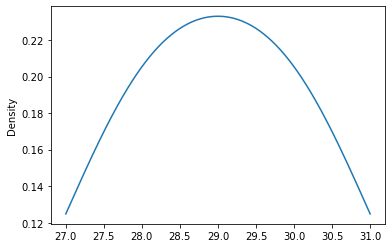

In [5]:
# Visualize the value counts of CLASS
CLASS_counts.plot.density()

In [11]:
# Split our preprocessed data into our features and target arrays
y = Diabetes_df['CLASS'].values
X = Diabetes_df.drop(['CLASS'],1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\saifu\AppData\Local\Temp/ipykernel_37064/1596219685.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = Diabetes_df.drop(['CLASS'],1).values


In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                8480      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 10,941
Trainable params: 10,941
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Train the model
fit_model = nn.fit(X_train, y_train,epochs=30)

Epoch 1/30
2/2 [==============================] - 4s 4ms/step - loss: 0.8212 - accuracy: 0.4651
Epoch 2/30
2/2 [==============================] - 0s 5ms/step - loss: 0.6376 - accuracy: 0.6512
Epoch 3/30
2/2 [==============================] - 0s 3ms/step - loss: 0.8471 - accuracy: 0.5581
Epoch 4/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7275 - accuracy: 0.5814
Epoch 5/30
2/2 [==============================] - 0s 5ms/step - loss: 0.6664 - accuracy: 0.6279
Epoch 6/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6344 - accuracy: 0.6512
Epoch 7/30
2/2 [==============================] - 0s 4ms/step - loss: 0.5757 - accuracy: 0.6744
Epoch 8/30
2/2 [==============================] - 0s 4ms/step - loss: 0.5903 - accuracy: 0.6512
Epoch 9/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6002 - accuracy: 0.6512
Epoch 10/30
2/2 [==============================] - 0s 4ms/step - loss: 0.5528 - accuracy: 0.7209
Epoch 11/30
2/2 [======================

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.6260 - accuracy: 0.7333 - 144ms/epoch - 144ms/step
Loss: 0.625988781452179, Accuracy: 0.7333333492279053


In [17]:
# Export our model to HDF5 file
nn.save("DeepLearning_Diabetes.h5")